In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2) 

In [2]:
X_train=np.array([[2104,5,1,45],[1416,3,2,40],[852,2,1,35]])
y_train=np.array([460,232,178])

In [3]:
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[460 232 178]


In [4]:
b_init=785.1811367994083
w_init=np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(w_init.shape)
print(type(b_init))

(4,)
<class 'float'>


In [5]:
def predict_single_loop(x, w, b): 
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]  
        p = p + p_i         
    p = p + b                
    return p

In [6]:
x_vec=X_train[0,:]
print(x_vec.shape)
print(x_vec)

(4,)
[2104    5    1   45]


In [7]:
f_wb=predict_single_loop(x_vec,w_init,b_init)
print(f_wb.shape)
print(f_wb)

()
459.9999976194083


In [8]:
def predict(x,w,b):
    f_wb=np.dot(x,w)+b
    return f_wb

In [9]:
f_wb=predict(x_vec,w_init,b_init)
print(f_wb.shape)
print(f_wb)

()
459.99999761940825


In [10]:
X_train.shape[0]

3

In [11]:
def compute_cost(X,y,w,b):
    m=X.shape[0]
    cost=0.0
    for i in range(m):
        f_wb=np.dot(w,X[i])+b
        cost+=(f_wb-y[i])**2
    cost=cost/(2*m)
    return cost

In [12]:
cost=compute_cost(X_train,y_train,w_init,b_init)
print(cost)

1.5578904880036537e-12


In [14]:
X_train.shape

(3, 4)

In [21]:
def compute_gradient(X,y,w,b):
    m=X.shape[0]
    n=X.shape[1]
    dj_dw=np.zeros((n,))
    dj_db=0
    for i in range(m):
        err=(np.dot(X[i],w)+b)-y[i]
        for j in range(n):
            dj_dw[j]+=err*X[i][j]
        dj_db+=err
    
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    return dj_dw, dj_db

In [20]:
x=np.zeros((3,))
print(x)

[0. 0. 0.]


In [22]:
tmp_dj_dw,tmp_dj_db=compute_gradient(X_train,y_train,w_init,b_init)
print(tmp_dj_dw)
print(tmp_dj_db)

[-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]
-1.673925169143331e-06


In [31]:
def gradient_descent(X,y,w,b,alpha,num_iters,compute_gradient,compute_cost):
    J_history=[]
    w=copy.deepcopy(w) #method to copy numpy array
    b=b
    
    for i in range(num_iters):
        dj_dw,dj_db=compute_gradient(X,y,w,b)
        
        w=w-alpha*(dj_dw)
        b=b-alpha*(dj_db)
        
        if i<100000:
            J_history.append(compute_cost(X,y,w,b))
            
        if i% math.ceil(num_iters/10)==0:
            print(f"Iteration {i:4d} Cost {J_history[-1]:8.2f}")
    
    return w,b,J_history        

In [34]:
initial_w=np.zeros_like(w_init)
initial_b=0.0
iterations=1000
alpha=5.0e-7

w_final,b_final,J_hist=gradient_descent(X_train,y_train,initial_w,initial_b,alpha,iterations,compute_gradient,compute_cost)

print(f"w_final={w_final} , b_final={b_final}")
m,_=X_train.shape
for i in range(m):
    print(f"prediction {(np.dot(X_train[i],w_final) +b_final)} , target_value= {y_train[i]}")

Iteration    0 Cost  2529.46
Iteration  100 Cost   695.99
Iteration  200 Cost   694.92
Iteration  300 Cost   693.86
Iteration  400 Cost   692.81
Iteration  500 Cost   691.77
Iteration  600 Cost   690.73
Iteration  700 Cost   689.71
Iteration  800 Cost   688.70
Iteration  900 Cost   687.69
w_final=[ 0.2   0.   -0.01 -0.07] , b_final=-0.002235407530932535
prediction 426.18530497189204 , target_value= 460
prediction 286.1674720078562 , target_value= 232
prediction 171.46763087132317 , target_value= 178


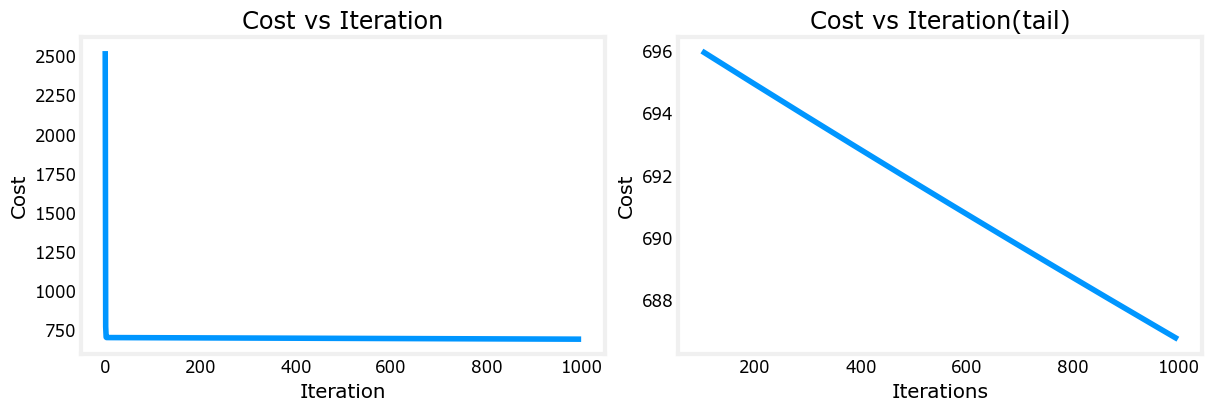

In [40]:
fig,(ax1,ax2)=plt.subplots(1,2,constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist)
ax2.plot(100+np.arange(len(J_hist[100:])),J_hist[100:])
ax1.set_title("Cost vs Iteration") ; ax2.set_title("Cost vs Iteration(tail)")
ax1.set_xlabel("Iteration") ; ax1.set_ylabel("Cost")
ax2.set_xlabel("Iterations") ; ax2.set_ylabel("Cost")
plt.show()